In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import copy
import statsmodels.stats.api as sms
from scipy.stats import wilcoxon
sns.set(style="darkgrid")
import test_mod as mod

### Importing data

In [22]:
name = 'patient'
var_name = 'age'

In [23]:
df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\{}.csv".format(name))
df.head()

,id,card_no,name,age,reg_no,address,notes
0,101,0681-19,Хад Цэнд,51.0,ЗП 68092304,Дундговь,NaN
1,102,0576-19,Цэрэнбалжир Сэдэд,50.0,НЭ 69072000,Төв аймаг,NaN
2,103,0646-19,Батцэцэг Буянтогтох,41.0,ДБ 78031401,СХД,NaN
3,104,0652-19,Баасанхүү Банди,51.0,ЧА 68031461,СХД,Химийн эмчилгээнд 2021.10.18нд эхэлсэн
4,105,0735-19,Нандин-Эрдэнэ Ичинхорлоо,59.0,ШБ 60052408,ХУД,NaN


In [24]:
quant_var = df[['id','{}'.format(var_name)]].copy()
quant_var.dropna(inplace=True)
quant_var.describe()

,id,age
count,85.000000,85.000000
mean,143.000000,51.752941
std,24.681302,10.449317
min,101.000000,27.000000
25%,122.000000,45.000000
50%,143.000000,52.000000
75%,164.000000,59.000000
max,185.000000,78.000000


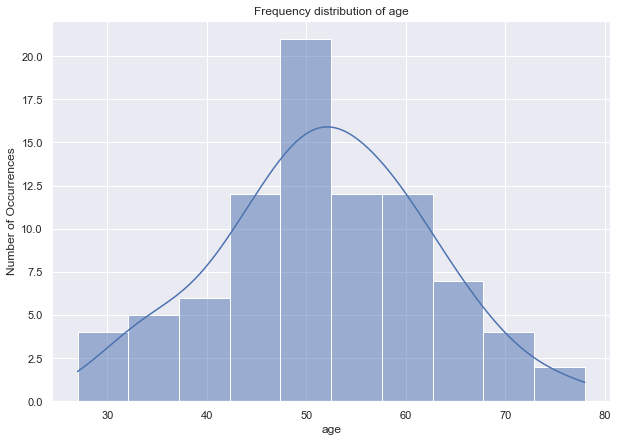

In [25]:
# Plotting a histogram
plt.figure(figsize=(10,7))
sns.histplot(quant_var['{}'.format(var_name)],kde=True,bins=10)
plt.title("Frequency distribution of {}".format(var_name))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('{}'.format(var_name),fontsize=12)
plt.show()

In [26]:
#Assigning groups by age limit
age_groups = {'20':quant_var.loc[quant_var['{}'.format(var_name)]<30],
          '30':quant_var.loc[(quant_var['{}'.format(var_name)]<40) & (quant_var['{}'.format(var_name)] >=30)],
          '40':quant_var.loc[(quant_var['{}'.format(var_name)]<50) & (quant_var['{}'.format(var_name)] >=40)],
          '50':quant_var.loc[(quant_var['{}'.format(var_name)]<60) & (quant_var['{}'.format(var_name)] >=50)],
          '60':quant_var.loc[(quant_var['{}'.format(var_name)]<70) & (quant_var['{}'.format(var_name)] >=60)],
          '70':quant_var.loc[(quant_var['{}'.format(var_name)]<80) & (quant_var['{}'.format(var_name)] >=70)],
          '80':quant_var.loc[(quant_var['{}'.format(var_name)]<90) & (quant_var['{}'.format(var_name)] >=80)]
          }

In [27]:
print(age_groups.get('60'))



     id   age
5   106  68.0
12  113  63.0
23  124  66.0
24  125  63.0
28  129  63.0
40  141  68.0
41  142  61.0
43  144  60.0
53  154  61.0
54  155  67.0
61  162  64.0
64  165  65.0
66  167  68.0
68  169  61.0
77  178  62.0


In [28]:
#Creating a dataframe with counts of patients in each age group
value_counts_list = []
for key, value in age_groups.items():
    value_counts_list.append((key,value['age'].count()))
value_counts_dict = {}
value_counts_dict.update(value_counts_list)
value_counts = pd.DataFrame(list(value_counts_dict.items()), columns=['{} group'.format(var_name),'Count'])
value_counts.head()

,age group,Count
0,20,1
1,30,9
2,40,22
3,50,35
4,60,15


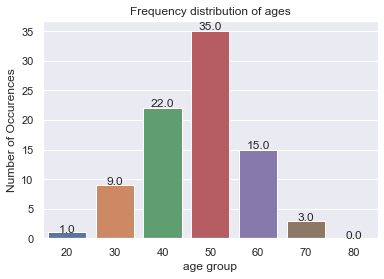

In [29]:
#Making a barplot
plot = sns.barplot(data=value_counts, x='{} group'.format(var_name), y = 'Count', ci=None)
mod.show_values(plot)
plt.title("Frequency distribution of {}s".format(var_name))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{} group'.format(var_name),fontsize=12)
plt.show()
